# Visualizando Retas com Diferentes Inclinações e Interceptos

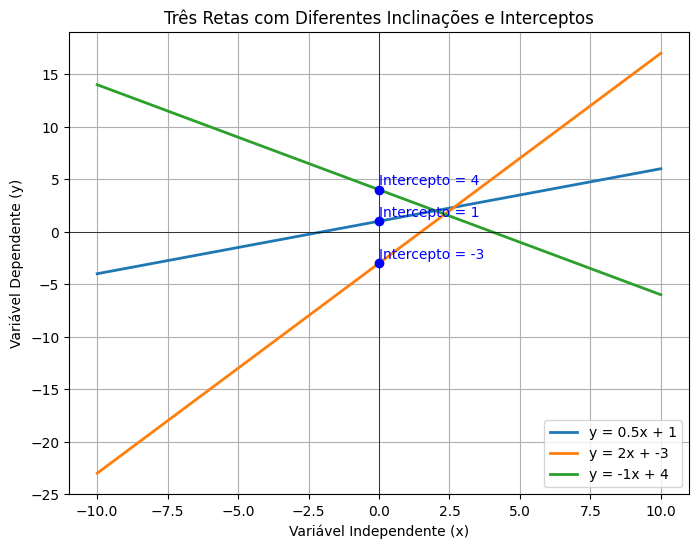

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os valores de inclinação (a) e intercepto (b) para cada reta
params = [
    {"a": 0.5, "b": 1},  # Inclinação 0.5, Intercepto 1
    {"a": 2, "b": -3},   # Inclinação 2, Intercepto -3
    {"a": -1, "b": 4}    # Inclinação -1, Intercepto 4
]

# Gerando valores de x (variável independente)
x = np.linspace(-10, 10, 100)

# Criando o gráfico para as três retas
plt.figure(figsize=(8, 6))

for param in params:
    a = param["a"]
    b = param["b"]
    y = a * x + b  # Calculando y com base na equação da reta: y = a*x + b
    plt.plot(x, y, label=f'y = {a}x + {b}', linewidth=2)

    # Destacando o intercepto no gráfico
    plt.scatter(0, b, color='blue', zorder=5)
    plt.text(0, b + 0.5, f'Intercepto = {b}', color='blue')

# Adicionando grades, título e legendas explicativas
plt.title('Três Retas com Diferentes Inclinações e Interceptos')
plt.xlabel('Variável Independente (x)')
plt.ylabel('Variável Dependente (y)')
plt.axhline(0, color='black', linewidth=0.5)  # Linha horizontal no eixo Y
plt.axvline(0, color='black', linewidth=0.5)  # Linha vertical no eixo X
plt.grid(True)  # Adicionando grid para facilitar a leitura
plt.legend()

# Exibindo o gráfico
plt.show()

# A Relação entre a Regressão Linear e um Neurônio

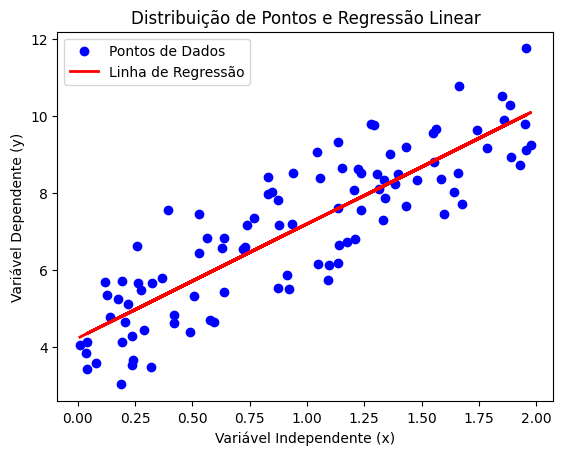

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerando dados de exemplo (distribuição de pontos)
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)  # Linha com alguma variação aleatória

# Ajustando o modelo de regressão linear
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)

# Plotando a distribuição de pontos e a linha de regressão
plt.scatter(x, y, color='blue', label='Pontos de Dados')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Distribuição de Pontos e Regressão Linear')
plt.xlabel('Variável Independente (x)')
plt.ylabel('Variável Dependente (y)')
plt.legend()
plt.show()

# Atualização dos Parâmetros

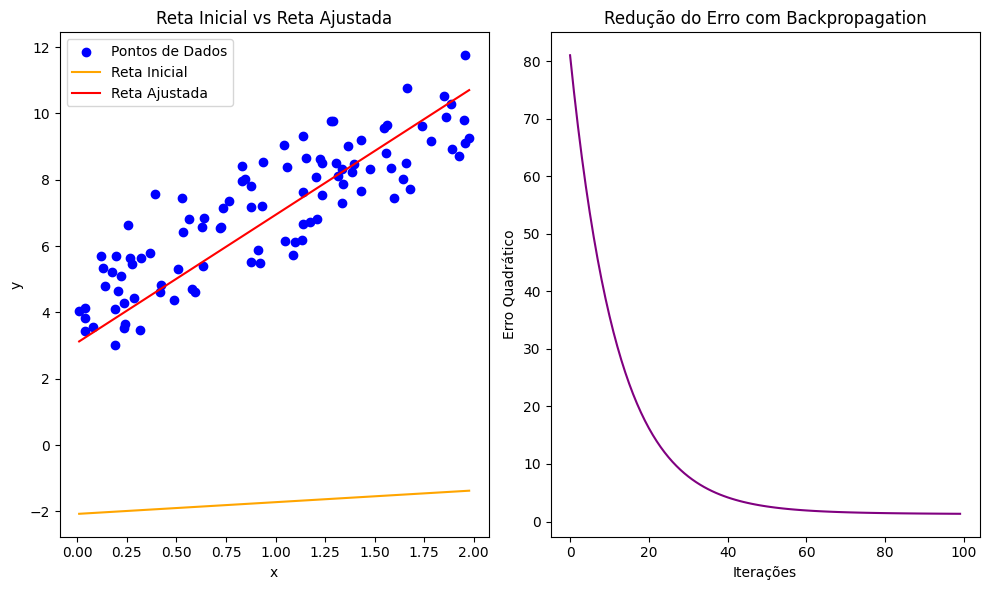

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo (nuvem de pontos)
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y_real = 4 + 3 * x + np.random.randn(100, 1)  # Linha com algum ruído

# Inicializa pesos e bias
w = np.random.randn(1)  # Peso inicial aleatório
b = np.random.randn(1)  # Bias inicial aleatório

# Definição da taxa de aprendizado
eta = 0.01  # Taxa de aprendizado

# Função para calcular a previsão
def predict(x, w, b):
    return w * x + b   #y_pred

# Função para calcular o erro quadrático
def loss(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

# Função para realizar uma iteração de backpropagation
def backpropagation(x, y_real, w, b, eta):
    # Forward pass: cálculo da previsão
    y_pred = predict(x, w, b)

    # Cálculo do erro quadrático
    erro = loss(y_real, y_pred)

    # Gradientes em relação a w e b
    grad_w = -2 * np.mean((y_real - y_pred) * x)
    grad_b = -2 * np.mean(y_real - y_pred)

    # Atualizando os parâmetros
    w -= eta * grad_w
    b -= eta * grad_b

    return w, b, erro

# Calculando a reta antes de ajustar os parâmetros
y_pred_inicial = predict(x, w, b)

# Executando múltiplas iterações para ajustar os parâmetros
num_iteracoes = 100
erros = []

for i in range(num_iteracoes):
    w, b, erro = backpropagation(x, y_real, w, b, eta)
    erros.append(erro)

# Calculando a reta ajustada
y_pred_final = predict(x, w, b)

# Plotando as retas antes e depois do ajuste
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y_real, color='blue', label='Pontos de Dados')
plt.plot([np.min(x), np.max(x)], [np.min(y_pred_inicial), np.max(y_pred_inicial)], color='orange', label='Reta Inicial')
plt.plot([np.min(x), np.max(x)], [np.min(y_pred_final), np.max(y_pred_final)], color='red', label='Reta Ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reta Inicial vs Reta Ajustada')
plt.legend()

# Plotando o erro ao longo das iterações
plt.subplot(1, 2, 2)
plt.plot(range(num_iteracoes), erros, color='purple')
plt.xlabel('Iterações')
plt.ylabel('Erro Quadrático')
plt.title('Redução do Erro com Backpropagation')

plt.tight_layout()
plt.show()


# Exercício: Ajuste de Regressão Linear com Backpropagation

Objetivos do Exercício:

* Implementar o gradiente descendente e backpropagation para ajustar os coeficientes da reta.

* Definir um erro mínimo (por exemplo, 0.001) que o modelo deve atingir.

* Utilizar três taxas de aprendizado (exemplo: 0.001, 0.01, 0.1) e verificar quantas iterações são necessárias para alcançar o erro mínimo com cada uma delas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo (nuvem de pontos)
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y_real = 4 + 3 * x + np.random.randn(100, 1)  # Linha com algum ruído

# Definindo as taxas de aprendizado e o erro mínimo desejado
#taxas_aprendizado = [0.001, 0.01, 0.1]
eta = 0.01
erro_min = 0.1

# Inicializando pesos e bias aleatoriamente
def initialize_params():
    w = np.random.randn(1)  # Peso inicial aleatório
    b = np.random.randn(1)  # Bias inicial aleatório
    return w, b

# Função para calcular a previsão (forward pass)
def predict(x, w, b):
    return w * x + b

# Função para calcular o erro quadrático médio
def loss(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

# Função para realizar uma iteração de backpropagation
def backpropagation(x, y_real, w, b, eta):
    # Forward pass: cálculo da previsão
    y_pred = predict(x, w, b)

    # Cálculo do erro quadrático
    erro = loss(y_real, y_pred)

    # Gradientes em relação a w e b
    grad_w = -2 * np.mean((y_real - y_pred) * x)
    grad_b = -2 * np.mean(y_real - y_pred)

    # Atualizando os parâmetros
    w -= eta * grad_w
    b -= eta * grad_b

    return w, b, erro

# Calculando a reta antes de ajustar os parâmetros
y_pred_inicial = predict(x, w, b)

# Executando múltiplas iterações para ajustar os parâmetros
num_iteracoes = 0
#w, b, erro = backpropagation(x, y_real, w, b, eta)
#num_iteracoes += 1
#erros.append(erro)
erro = 1000
while erro > erro_min:
  w, b, erro = backpropagation(x, y_real, w, b, eta)
  erros.append(erro)
  num_iteracoes += 1

print(f"Número de iterações necessárias para erro mínimo: {num_iteracoes}")

KeyboardInterrupt: 